#  Analysis on Regression Data 


In [ ]:
import matplotlib.pyplot as plt                                                  # Make the foll imports to plot graphs,arrange and get numbers, transform numbers to pytorch,scipy system
from matplotlib import pylab
from numpy import arange,array,ones
from scipy import stats
from scipy.stats import norm
import numpy as np
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn
import pandas as pd
import seaborn as sns
import urllib
import torchvision
import torchvision.transforms as transforms
!pip install wget


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=a3255b790ec0d07ded2bccde5f1cc99e4215fc635ac967e1d29e43a359bee163
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import shutil                                                                   #Import shutil to get data stored in google drive

In [ ]:
!ls

sample_data


In [ ]:
!pwd

/content


In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.listdir('/content/drive/My Drive/my data SETS 1/')                                                                             #list out whats on the drive in that folder

['cmc.data',
 'Facebook_metrics.txt',
 'Absenteeism_at_work.xls',
 'audit_risk.csv',
 'Residential-Building-Data-Set (1).xlsx',
 'risk_factors_cervical_cancer.csv',
 'data_akbilgic.xlsx',
 'Facebook_metrics.zip',
 'dataset_Facebook.csv',
 'auto-mpg (1).data - Shortcut.lnk',
 'divorce',
 'YearPredictionMSD.txt',
 '.ipynb_checkpoints',
 'divorce.csv',
 'divorce.xlsx',
 '2 Residential data set multivariate regression1.xlsx',
 '3residential Data.xlsx']

# 1 Data Analysis on Residential Building Set ( Simple Linear Regression)

 Data set includes construction cost, sale prices, project variables, and economic variables corresponding to real estate single-family residential apartments in Tehran, Iran.

Purpose: make a prediction of the construction cost based on a project physical and financial variable V8 

The sale prices can also be predicted using project variables, and economic variables corresponding to real estate single-family residential apartments in Tehran, Iran

Totally 105: 8 project physical and financial variables, 19 economic variables and indices in 5 time lag numbers (5*19 = 95), and two output variables that are construction costs and sale prices

In [ ]:
d=pd.read_excel('/content/drive/My Drive/my data SETS 1/Residential-Building-Data-Set (1).xlsx')                         #Read data as excel copied from google drive

In [ ]:
d


,PROJECT DATES (PERSIAN CALENDAR),Unnamed: 1,Unnamed: 2,Unnamed: 3,PROJECT PHYSICAL AND FINANCIAL VARIABLES,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,ECONOMIC VARIABLES AND INDICES IN TIME LAG 1,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,ECONOMIC VARIABLES AND INDICES IN TIME LAG 2,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,ECONOMIC VARIABLES AND INDICES IN TIME LAG 4,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,ECONOMIC VARIABLES AND INDICES IN TIME LAG 5,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,OUTPUTS,Unnamed: 108
0,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,...,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
1,81,1,85,1,1,3150,920,598.5,190,1010.84,16,1200,6713,56.2,61.52,6.11,320957,3485.8,64.5,239.5,12456.6,15,797.3,809.8,1755,8003,67.81,63.25,3758.77,42587,628133,4986,55.5,60.78,3.94,297210,3663.5,61.5,179.63,9342.45,...,5728,52.4,57.65,5.4,262789,2931.4,54.2,59.88,3114.15,15,746.8,815.5,1755,8013,62.78,56.45,3387.72,10646.8,606524,7196,51.3,56.13,5.97,249111,2562.3,52.8,217,10445.6,15,733.8,815.5,1755,8002,60.74,54.26,2978.26,41407,601988,2200,410
2,84,1,89,4,1,7600,1140,3040,400,963.81,23,2900,3152,106,103.03,3.15,685698,3526.1,105.5,208.8,17584.3,15,1408.4,1473.5,8842.18,8864,105.52,105.32,12113,45966,1.189e+06,2700,103,101.84,2.65,625829,4386.9,100.4,156.6,13188.2,...,3157,92.8,96.49,3.05,552124,3896.7,96.9,52.2,4396.08,15,1294.2,1288,8555.54,8585,95.35,94.34,12063.5,11491.5,954629,3678,86.2,83.21,3.25,526596,2790.6,94.1,334.8,14488.6,15,1143.8,1316.3,8364.78,8393,90.95,89.79,11379.4,44835,929027,5000,1000
3,78,1,81,4,1,4800,840,480,100,689.84,15,630,1627,41,41.25,1.74,160402,1217.5,34.4,285.8,6489.1,15,614,608.2,1755,7773,45.91,38.34,1537.96,39066,524765,1580,40.3,40.84,1.15,150267,1149.5,34.1,214.35,4866.83,...,2374,38,39.43,0.92,134548,1191.1,33.7,71.45,1622.28,15,574.6,680.5,1755,5565,41.03,33.37,1601.79,9766.5,403875,2693,36.2,37.64,1.55,134312,1529,31.43,175.7,3994.7,15,589.5,765.8,1755,4930,38.7,32.04,1653.06,37933,377829,1200,170
4,72,2,73,2,1,685,202,13.7,20,459.54,4,140,2580.93,12.1,10.03,1.24,38193.6,287.2,13.6,17.03,154.4,12,183.6,211.1,1612.95,1649,11.62,10.06,392.96,8435.75,141543,2952,11.6,8.5,1.99,35859.4,322.5,12.67,56.6,610.4,...,2312,10.6,5.44,2.58,30012.5,345.3,10.79,28.3,305.2,12,180.372,158.45,1439,1450,9.91,8.85,590.64,16388,121857,1381,10,3.91,3,27231.2,316.5,9.85,14.15,152.6,12,197.68,152.25,1442.31,1456,9.73,8.34,686.16,8194,122032,165,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,83,4,86,1,20,1350,350,108,80,251.37,9,830,2700,103,101.84,2.65,625829,4386.9,100.4,156.6,13188.2,15,1424.1,1584.3,8776.71,8799,101,101.89,13571.8,34474.5,1067772,3561,98.2,98.64,2.76,602225,3819,97.2,104.4,8792.15,...,3678,86.2,83.21,3.25,526596,2790.6,94.1,334.8,14488.6,15,1143.8,1316.3,8

In [ ]:
d.columns                                                                                                          

Index(['PROJECT DATES (PERSIAN CALENDAR)', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'PROJECT PHYSICAL AND FINANCIAL VARIABLES', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 99', 'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102',
       'Unnamed: 103', 'Unnamed: 104', 'Unnamed: 105', 'Unnamed: 106',
       'OUTPUTS', 'Unnamed: 108'],
      dtype='object', length=109)

In [ ]:
d1=pd.read_excel('/content/drive/My Drive/my data SETS 1/Residential data set simple regression1.xlsx')

In [ ]:
d1                                                                                                                    #Cutting the data to fit what is needed

,V1,V2,V3,V4,V5,V6,V7,V8,output
0,1,3150.0,920.0,598.5,190,1010.84,16,1200,2200
1,1,7600.0,1140.0,3040.0,400,963.81,23,2900,5000
2,1,4800.0,840.0,480.0,100,689.84,15,630,1200
3,1,685.0,202.0,13.7,20,459.54,4,140,165
4,1,3000.0,800.0,1230.0,410,631.91,13,5000,5500
...,...,...,...,...,...,...,...,...,...
367,20,1350.0,350.0,108.0,80,251.37,9,830,1100
368,20,600.0,150.0,36.0,60,299.55,6,570,740
369,20,1900.0,430.0,285.0,150,364.41,7,640,860
370,20,510.0,160.0,30.6,60,245.28,9,790,1100


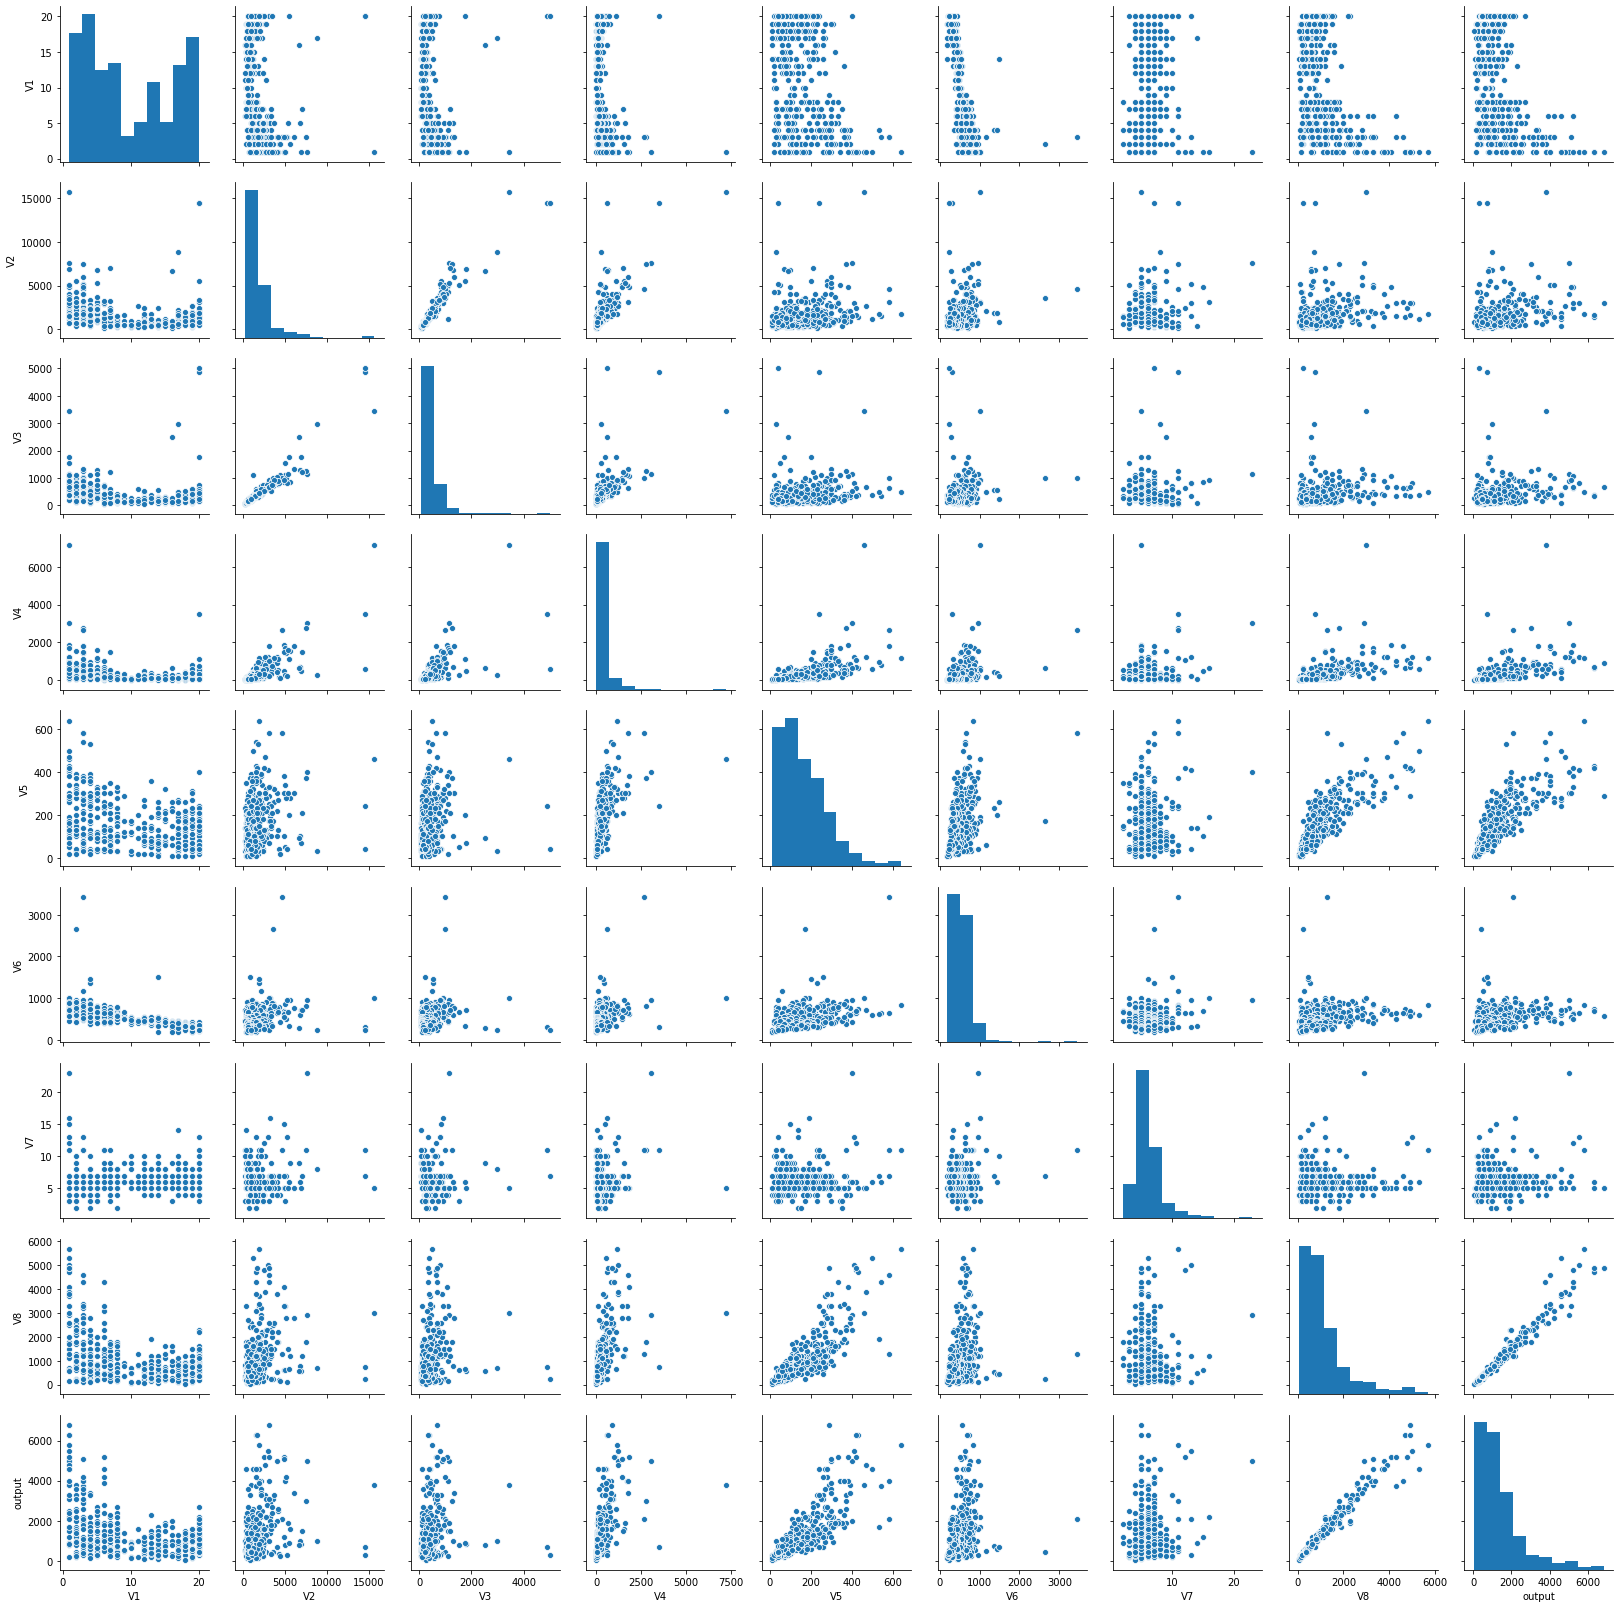

In [ ]:
                                                                                          #Plot the pairwise relationship in a dataset to see which variable as a fairly good scatter plot
sns.pairplot(d1)

In [ ]:
                                                                                                      #Compute pairwise correlation for a variable withe the other variables
d1.corr()['output'].sort_values(ascending=False)

output    1.000000
V8        0.976432
V5        0.784986
V4        0.512995
V2        0.254336
V6        0.192130
V3        0.163545
V7        0.139202
V1       -0.435081
Name: output, dtype: float64

In [ ]:
                                                                                                         #Select the dependent and independent variables
x=d1['V8']
y=d1['output']

**Regression with Scipy**

In [ ]:
                                                                                                         # Generated linear fit using builtin function as ground truth for testing
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [ ]:
slope

1.182593472858632

In [ ]:
intercept

100.63122058140584

In [ ]:
plt. plot()

In [ ]:
y_prd=1.18*x+100.63                                                                                      # Define the function of y

In [ ]:
plt.plot(x,y,'.', x,y_prd)                                                                               # Plot the y function

In [ ]:
r_value                                                                                                 # margin of error                                 

In [ ]:
p_value                                                                                                 #difference between the actual and predicted

1.7670007152672153e-248

# **Simple linear using Pytorch**

In [ ]:

                                                                                                       #  Defining Hyper-parameters
input_size = 1
output_size = 1
num_epochs =600
learning_rate = 0.001

In [ ]:
                                                                                                       # Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
                                                                                                       # Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
                                                                                                       #Setting the variables of interest
x=np.asarray(d1['V8'],dtype=np.float32)
y=np.asarray(d1['output'],dtype=np.float32)

In [ ]:
x.shape

In [ ]:
x=x[:,None]
y=y[:,None]

In [ ]:
                                                                                                         # Convert numpy arrays to torch tensors( pytorch uses torch tensors)
inputs =torch.from_numpy(x)
targets = torch.from_numpy(y)

In [ ]:
inputs.shape

In [ ]:
                                                                                                         # Train the model to include gradient descent
for epoch in range(num_epochs):
    
    
                                                                                                         # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
                                                                                                         # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())

1 600 nan
2 600 nan
3 600 nan
4 600 nan
5 600 nan
6 600 nan
7 600 nan
8 600 nan
9 600 nan
10 600 nan
11 600 nan
12 600 nan
13 600 nan
14 600 nan
15 600 nan
16 600 nan
17 600 nan
18 600 nan
19 600 nan
20 600 nan
21 600 nan
22 600 nan
23 600 nan
24 600 nan
25 600 nan
26 600 nan
27 600 nan
28 600 nan
29 600 nan
30 600 nan
31 600 nan
32 600 nan
33 600 nan
34 600 nan
35 600 nan
36 600 nan
37 600 nan
38 600 nan
39 600 nan
40 600 nan
41 600 nan
42 600 nan
43 600 nan
44 600 nan
45 600 nan
46 600 nan
47 600 nan
48 600 nan
49 600 nan
50 600 nan
51 600 nan
52 600 nan
53 600 nan
54 600 nan
55 600 nan
56 600 nan
57 600 nan
58 600 nan
59 600 nan
60 600 nan
61 600 nan
62 600 nan
63 600 nan
64 600 nan
65 600 nan
66 600 nan
67 600 nan
68 600 nan
69 600 nan
70 600 nan
71 600 nan
72 600 nan
73 600 nan
74 600 nan
75 600 nan
76 600 nan
77 600 nan
78 600 nan
79 600 nan
80 600 nan
81 600 nan
82 600 nan
83 600 nan
84 600 nan
85 600 nan
86 600 nan
87 600 nan
88 600 nan
89 600 nan
90 600 nan
91 600 nan
92 600 n

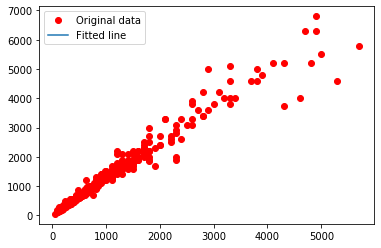

In [ ]:
                                                                                                                           # Plot the graph
predicted = model(inputs).detach().numpy()



plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

# 2 Data on year prediction (Multi-linear regression)

Purpose :Prediction of the release year of a song from audio features. Songs are mostly western, commercial tracks ranging from 1922 to 2011, with a peak in the year 2000s

Data Set Information:

You should respect the following train / test split:
train: first 463,715 examples
test: last 51,630 examples
It avoids the 'producer effect' by making sure no song
from a given artist ends up in both the train and test set.


Attribute Information:
12 = timbre average, 78 = timbre covariance
The first value is the year (target), ranging from 1922 to 2011.
Features extracted from the 'timbre' features from The Echo Nest API.
We take the average and covariance over all 'segments', each segment
being described by a 12-dimensional timbre vector.

Data was minimize to using the averages (first 12 for this regression)

In [ ]:
e=pd.read_csv('/content/drive/My Drive/my data SETS 1/YearPredictionMSD.txt', sep=",",header= None)

In [ ]:
e


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.6

In [ ]:
e.shape

(515345, 91)

In [ ]:
timbre1=e[1]                                                                                                          #Telling Pytorch to recognized names for columns 

In [ ]:
timbre2=e[2]

In [ ]:
timbre3=e[3]

In [ ]:
timbre4=e[4]

In [ ]:
timbre5=e[5]

In [ ]:
timbre6=e[6]

In [ ]:
timbre7=e[7]

In [ ]:
timbre8=e[8]

In [ ]:
timbre9=e[9]

In [ ]:
timbre10=e[10]

In [ ]:
timbre11=e[11]

In [ ]:
timbre12=e[12]

In [ ]:
year=e[0]

In [ ]:
e1=e.columns[1] 

In [ ]:
e.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,1.000000,0.225374,0.021402,-0.139541,-0.003286,0.019338,-0.187443,0.110460,-0.034977,-0.024796,0.033180,0.030514,-0.097164,0.023284,0.078700,-0.007229,0.032829,0.030661,0.021965,-0.004512,0.087057,-0.056664,0.049736,0.046367,-0.058200,0.064713,-0.018139,-0.023177,0.008784,0.073327,0.017851,-0.073928,0.027000,-0.091186,0.043047,-0.043967,-0.101007,-0.041284,0.074424,0.070340,...,0.026813,-0.053082,0.074052,-0.047616,0.011095,0.007192,-0.096973,-0.004997,-0.092747,-0.067164,-0.024851,-0.043649,-0.126348,0.000396,-0.039029,-0.054410,-0.102841,0.081341,-0.099484,0.047042,-0.006024,-0.068272,0.083755,0.081748,0.028523,0.012845,-0.014098,-0.087386,0.031392,-0.004890,-0.040069,0.002492,0.014041,0.027610,0.059477,-0.053548,0.024589,-0.037432,0.008380,-0.056485
1,0.225374,1.000000,0.561747,0.245415,0.022270,-0.283635,-0.267820,0.170659,-0.057822,0.218736,0.103704,0.063742,-0.135719,-0.359120,-0.438479,-0.446479,-0.372031,-0.391014,-0.288288,-0.435819,-0.318501,-0.483091,-0.298362,-0.251080,-0.432403,0.106996,-0.147110,-0.170153,0.071698,0.139775,-0.035386,-0.138302,0.102166,-0.094279,-0.049563,-0.049761,-0.380223,-0.179129,0.005297,0.015806,...,-0.068024,-0.105238,0.070950,-0.047993,0.217249,-0.273952,-0.147027,-0.125236,-0.143399,-0.127194,-0.021453,0.112570,-0.518865,0.093357,0.028467,-0.056059,-0.111789,0.048707,-0.099931,0.129509,0.304508,-0.041774,0.078453,0.023752,0.051395,0.260738,-0.237966,-0.003496,0.133392,0.034193,-0.359808,0.190359,-0.137876,0.030790,0.130742,-0.025499,0.048367,-0.145238,-0.105449,-0.183504
2,0.021402,0.561747,1.000000,0.018479,0.126845,-0.184864,-0.112388,0.115468,0.108088,0.126086,0.371357,-0.087246,-0.058013,-0.160260,-0.276643,-0.168259,-0.108709,-0.187142,-0.029287,-0.189841,-0.100422,-0.333089,-0.081674,0.003941,-0.281079,-0.089834,-0.045908,-0.188812,0.144542,0.264624,0.053545,-0.155426,0.201881,-0.105850,0.031848,-0.132042,-0.304312,-0.075656,0.231934,-0.067107,...,-0.139569,0.016503,0.141637,-0.112650,0.185909,-0.192463,-0.056762,0.074525,-0.035429,0.029541,-0.002459,0.081143,-0.352473,0.129173,-0.088037,-0.059252,-0.062233,0.108637,-0.088377,0.103441,0.226173,-0.110731,0.017447,0.054829,-0.013319,0.285924,-0.276564,-0.074685,0.065723,0.030322,-0.289733,0.053480,-0.151313,0.022337,0.150309,0.048165,-0.004499,-0.015567,-0.121116,-0.159893
3,-0.139541,0.245415,0.018479,1.000000,0.152488,-0.131741,0.040808,-0.057642,0.080881,0.043885,-0.089869,0.041447,-0.020443,-0.075219,-0.236458,-0.197375,-0.291798,-0.112668,-0.386215,-0.114689,-0.371624,-0.040652,-0.347095,-0.295373,-0.010870,-0.051478,0.033093,0.209697,0.117118,-0.155834,-0.287104,0.114329,-0.117860,0.243161,-0.112136,0.224575,-0.165085,0.018542,-0.067861,-0.020340,...,-0.164228,0.121524,-0.171314,0.070928,-0.113885,-0.217948,-0.038976,0.045579,-0.090247,0.153502,-0.057036,0.079174,-0.143712,0.129376,-0.024642,0.163805,0.118245,-0.203669,0.044610,-0.035847,0.054819,0.172613,-0.228826,-0.091912,0.177845,0.005463,-0.052827,0.065574,-0.109016,-0.015031,0.070644,0.172473,0.109202,-0.007989,-0.033774,-0.093817,0.078392,-0.060559,-0.099712,0.094694
4,-0.003286,0.022270,0.126845,0.152488,1.000000,0.034988,0.321159,0.282162,0.031649,-0.037905,0.165343,0.309592,-0.103036,-0.025147,0.150262,0.270506,0.357279,0.149118,0.516591,0.155926,0.301542,0.015263,0.300744,0.435414,0.040093,-0.030103,0.096401,-0.358660,-0.019718,0.341134,0.319784,-0.099214,0.119724,-0.152007,0.305984,-0.278722,-0.101551,0.087190,0.191226,-0.060426,...,0.149169,-0.040916,0.072971,-0.173292,-0.078758,0.141827,-0.048548,0.053949,-0.046679,-0.060658,0.146864,-0.030744,-0.037436,0.009713,-0.183840,-0.114650,-0.167536,0.407770,-0.138733,0.079792,0.029508,-0.119772,0.104334,0.133898,-0.203185,-0.095775,-0.004992,-0.266636,0.029030,-0.064654,-0.018894,-0.09073

([<matplotlib.axis.YTick at 0x7f08979c7358>,
 <a list of 91 Text yticklabel objects>)

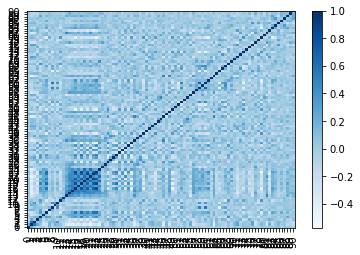

In [ ]:
plt.imshow(e.corr(), origin='lower', aspect = 'auto', cmap=plt.cm.Blues, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(e.columns))]
plt.xticks(tick_marks, e.columns, rotation='vertical')
plt.yticks(tick_marks, e.columns)

In [ ]:
                                                                                                                           #Assessing the relationship between the year and timbre
import statsmodels.formula.api as sm
modelAll = sm.ols('year ~ timbre1+ timbre2 +timbre3+ timbre4+ timbre5+ timbre6+ timbre7+ timbre8+ timbre9+ timbre10+ timbre11+ timbre12', e).fit()
modelAll.params

Intercept    1964.473405
timbre1         0.746507
timbre2        -0.055602
timbre3        -0.073808
timbre4         0.138854
timbre5         0.013020
timbre6        -0.213966
timbre7        -0.061864
timbre8        -0.047921
timbre9        -0.118504
timbre10        0.088869
timbre11       -0.451246
timbre12        0.041810
dtype: float64

In [ ]:
                                                                                                                            # running the predicted model :
y_pred=0.746507*timbre1+( -0.055602)*timbre2 +(-0.073808)*timbre3 + 0.138854*timbre4+( 0.013020)*timbre5 +(-0.213966)*timbre6+ -0.061864*timbre7+( -0.047921)*timbre8 +(-0.118504)*timbre9+ 0.088869*timbre10+(-0.451246)*timbre11 +(0.041810)*timbre12  
y_true=year

In [ ]:
                                                                                                                            #coefficient_of_dermination
from sklearn.metrics import r2_score

r2 = r2_score(y_true,y_pred)

In [ ]:
r2                                                                                                                          #Margin of error

-32297.4012864597

In [ ]:
                                                                                                                        #summary
modelAll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     7946.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:57:22   Log-Likelihood:            -1.9200e+06
No. Observations:              515345   AIC:                         3.840e+06
Df Residuals:                  515332   BIC:                         3.840e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1964.4734      0.142   1.38e+04      0.000    1964.195    1964.752
timbre1        0.7465      0.003    229.872      0.000       0.740       0.753
timbre2       -0.0556      0.000   -148.617      0.000      -0.056      -0.055
timbre3       -0.0738      0.000   -163.183      0.000      -0.075      -0.073
timbre4        0.1389      0.002     85.551      0.000       0.136       0.142
timbre5        0.0130      0.001     19.330      0.000       0.012       0.014
timbre6       -0.2140      0.002   -108.540      0.000      -0.218      -0.210
timbre7       -0.0619      0.001    -43.367      0.000      -0.065      -0.059
timbre8       -0.0479      0.002    -21.503      0.000      -0.052      -0.044
timbre9       -0.1185      0.002    -72.722      0.000      -0.122      -0.115
timbre10       0.0889      0.003     28.167      0.000       0.083       0.095
timbre11      -0.4512      0.006    -79.228      0.000      -0.462      -0.440
timbre12       0.0418      0.002     21.064      0.000       0.038       0.046
==============================================================================
Omnibus:                   149926.825   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457401.274
Skew:                          -1.511   Prob(JB):                         0.00
Kurtosis:                       6.489   Cond. No.                         543.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multiple Linear regression using Pytorch

In [ ]:
                                                                                                                                    #Setting the variables of interest
x=np.asarray(([timbre1,timbre2,timbre3,timbre4,timbre5,timbre6,timbre7,timbre8,timbre9,timbre10,timbre11,timbre12]),dtype=np.float32)
y=np.asarray((year),dtype=np.float32)

In [ ]:

x

array([[ 49.94357,  48.73215,  50.95714, ...,  45.12852,  44.16614,
         51.85726],
       [ 21.47114,  18.4293 ,  31.85602, ...,  12.65758,  32.38368,
         59.11655],
       [ 73.0775 ,  70.32679,  55.81851, ..., -38.72018,  -3.34971,
         26.39436],
       ...,
       [ -2.46783,   4.5921 ,   1.39518, ..., -11.46411,  -0.74075,
          6.26597],
       [  3.32136,   2.2192 ,   2.73553, ...,   3.28514,  -1.26523,
         -1.788  ],
       [ -2.31521,   0.34006,   0.82804, ...,   1.99943,  -4.41983,
         -6.19786]], dtype=float32)

In [ ]:
                                                                                                                                    # Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x)
targets = torch.from_numpy(y)
print(inputs)
print(targets)

tensor([[ 49.9436,  48.7322,  50.9571,  ...,  45.1285,  44.1661,  51.8573],
        [ 21.4711,  18.4293,  31.8560,  ...,  12.6576,  32.3837,  59.1166],
        [ 73.0775,  70.3268,  55.8185,  ..., -38.7202,  -3.3497,  26.3944],
        ...,
        [ -2.4678,   4.5921,   1.3952,  ..., -11.4641,  -0.7408,   6.2660],
        [  3.3214,   2.2192,   2.7355,  ...,   3.2851,  -1.2652,  -1.7880],
        [ -2.3152,   0.3401,   0.8280,  ...,   1.9994,  -4.4198,  -6.1979]])
tensor([2001., 2001., 2001.,  ..., 2006., 2006., 2005.])


In [ ]:
inputs.shape

In [ ]:
targets.shape

In [ ]:
                                                                                                                                        # Define Weights and biases
w = torch.randn(12,1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

tensor([[ 1.3235],
        [-0.8137],
        [-1.1476],
        [-1.2911],
        [-1.7177],
        [-0.7931],
        [ 1.4018],
        [ 0.7847],
        [-0.5420],
        [ 0.4092],
        [-0.7658],
        [ 1.6312]], requires_grad=True)
tensor([-1.9069], requires_grad=True)


In [ ]:
w.shape

torch.Size([12, 1])

In [ ]:
                                                                                                                                       # Define the model
def model(x):
    return  x * w + b

In [ ]:
                                                                                                                                       # Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 6.4194e+01,  6.2590e+01,  6.5535e+01,  ...,  5.7821e+01,
          5.6547e+01,  6.6726e+01],
        [-1.9377e+01, -1.6902e+01, -2.7827e+01,  ..., -1.2206e+01,
         -2.8256e+01, -5.0008e+01],
        [-8.5772e+01, -8.2615e+01, -6.5965e+01,  ...,  4.2529e+01,
          1.9373e+00, -3.2197e+01],
        ...,
        [-2.9168e+00, -2.7599e-02, -1.3359e+00,  ..., -6.5984e+00,
         -2.2100e+00,  6.5742e-01],
        [-4.4503e+00, -3.6063e+00, -4.0017e+00,  ..., -4.4226e+00,
         -9.3799e-01, -5.3766e-01],
        [-5.6834e+00, -1.3522e+00, -5.5617e-01,  ...,  1.3546e+00,
         -9.1165e+00, -1.2017e+01]], grad_fn=<AddBackward0>)


In [ ]:
                                                                                                                                       # Compare with targets
print(targets)

tensor([2001., 2001., 2001.,  ..., 2006., 2006., 2005.])


**Loss Function**

We can compare the predictions with the actual targets, using the following method:



In [ ]:
                                                                                                                                         # defining loss function
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [ ]:
                                                                                                                                          # Compute loss
loss = mse(preds, targets)
print(loss)

tensor(3981490., grad_fn=<DivBackward0>)


# 3 Data analysis on Residentail Building ( Multivariate Regression)
Data set includes construction cost, sale prices, project variables, and economic variables corresponding to real estate single-family residential apartments in Tehran, Iran.

Purpose: make a prediction of the construction cost and the sale price based on all the project physical and financial variable corresponding to real estate single-family residential apartments in Tehran, Iran

In [ ]:
import matplotlib.pyplot as plt                                                                                       #Import the following
from matplotlib import pylab
from numpy import arange,array,ones
from scipy import stats
from scipy.stats import norm
import numpy as np
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn
import pandas as pd
import seaborn as sns
import urllib
import torchvision
import torchvision.transforms as transforms
import requests
from sklearn import linear_model

In [ ]:
g=pd.read_excel('/content/drive/My Drive/my data SETS 1/3residential Data.xlsx')

In [ ]:
g

,V1,V2,V3,V4,V5,V6,V7,V8,V-9,V-10
0,1,3150.0,920.0,598.5,190,1010.84,16,1200,2200,410
1,1,7600.0,1140.0,3040.0,400,963.81,23,2900,5000,1000
2,1,4800.0,840.0,480.0,100,689.84,15,630,1200,170
3,1,685.0,202.0,13.7,20,459.54,4,140,165,30
4,1,3000.0,800.0,1230.0,410,631.91,13,5000,5500,700
...,...,...,...,...,...,...,...,...,...,...
367,20,1350.0,350.0,108.0,80,251.37,9,830,1100,150
368,20,600.0,150.0,36.0,60,299.55,6,570,740,80
369,20,1900.0,430.0,285.0,150,364.41,7,640,860,220
370,20,510.0,160.0,30.6,60,245.28,9,790,1100,110


In [ ]:
                                                                                                                                   #Set up the dependent and independent variables
x= g[['V1','V2','V3','V4','V5','V6','V7','V8']]
y= g[['V-9','V-10']]  

In [ ]:
x.shape, y.shape

((372, 8), (372, 2))

In [ ]:
y

,V-9,V-10
0,2200,410
1,5000,1000
2,1200,170
3,165,30
4,5500,700
...,...,...
367,1100,150
368,740,80
369,860,220
370,1100,110


In [ ]:
                                                                                                                              # using code for multivariate linear regression (lm)
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [ ]:
                                                                                                                              # Provide the prediction values
predictions = lm.predict(x)
y_pred=print(predictions)

In [ ]:
coef=lm.coef_ 

In [ ]:
coef                                                                                                                          #finding the coefficients of x (gradient)

array([[-3.39469574e-01,  8.72155216e-02, -2.93355687e-01,
         1.11047768e-02, -5.80231421e-01,  4.66439588e-02,
         3.74940494e+01,  1.21023802e+00],
       [-3.46144429e-01,  5.15765301e-03, -2.20686444e-02,
         1.07077066e-02,  1.32716045e+00, -2.02607519e-02,
         1.32615020e+01,  1.41155219e-03]])

In [ ]:
                                                                                                                              # Residuals (Y-pred)

residual =(y-predictions)
residual
residual.describe()

,V-9,V-10
count,3.720000e+02,3.720000e+02
mean,-2.432654e-13,2.284433e-14
std,2.369042e+02,3.270799e+01
min,-1.649789e+03,-1.191356e+02
25%,-6.154198e+01,-1.603349e+01
50%,-2.559290e+01,-6.949309e-01
75%,4.566849e+01,1.836293e+01
max,9.498958e+02,1.902053e+02


In [ ]:
                                                                                                                             #Margin of Error
from sklearn.metrics import r2_score

r2 = r2_score(y,predictions)
r2

0.9604836901844603

                                                                               running the model

In [ ]:
V-9 =(-3.39469574e-01)*v1+(8.72155216e-0)2*V2+ (-2.93355687e-01)*V3+ (1.11047768e-02)*V4+(-5.80231421e-01)*V5+(4.66439588e-0)2*V6+(3.74940494e+01)*V7 + (1.21023802e+00)*V8)
V-10= (-3.46144429e-01)*V1+ (5.15765301e-03)*V2+ (-2.20686444e-02)*V3+ (1.07077066e-02)V4+ (1.32716045e+00)*V5 + (-2.02607519e-02)*V6+ (1.32615020e+01)*V7+ (1.41155219e-03)*V8)